## Load the Datasets and Check them

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
df=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
df_test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

### Here we should do same operations on both train and test datasets. So lets do it in Parallel

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
print("Training dataset shape {}".format(df.shape))
print("Testing dataset shape {}".format(df_test.shape))

Training dataset shape (8693, 14)
Testing dataset shape (4277, 13)


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [7]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4186.0,28.658146,14.179072,0.0,19.0,26.0,37.0,79.0
RoomService,4195.0,219.266269,607.011289,0.0,0.0,0.0,53.0,11567.0
FoodCourt,4171.0,439.484296,1527.663045,0.0,0.0,0.0,78.0,25273.0
ShoppingMall,4179.0,177.295525,560.821123,0.0,0.0,0.0,33.0,8292.0
Spa,4176.0,303.052443,1117.186015,0.0,0.0,0.0,50.0,19844.0
VRDeck,4197.0,310.710031,1246.994742,0.0,0.0,0.0,36.0,22272.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [10]:
print("columns of training data are :",df.columns)
print('-'*100)
print("columns of testing data are :",df_test.columns)

columns of training data are : Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
----------------------------------------------------------------------------------------------------
columns of testing data are : Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')


In [11]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## By moving each Column in Both Datasets in Parallel, Perform required operations on each of it.

In [13]:
print("For HomePlanet Column in Training Data")
print(df['HomePlanet'].value_counts())
print("Null values are:",df['HomePlanet'].isnull().sum())

df['HomePlanet'].fillna(value="unknown",inplace=True)

print("Nulls are filled")
print("Null values after filling are:",df['HomePlanet'].isnull().sum())

dummies_HomePlanet=pd.get_dummies(df['HomePlanet'],dtype=int,prefix='HP')
dummies_HomePlanet=dummies_HomePlanet.iloc[:,:-1] #dropping unknown column instead of drop_first
df=df.join(dummies_HomePlanet).drop('HomePlanet',axis=1)

For HomePlanet Column in Training Data
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
Null values are: 201
Nulls are filled
Null values after filling are: 0


In [14]:
print("For HomePlanet Column in Testing Data")
print(df_test['HomePlanet'].value_counts())
print("Null values are:",df_test['HomePlanet'].isnull().sum())

df_test['HomePlanet'].fillna(value="unknown",inplace=True)

print("Nulls are filled")
print("Null values after filling are:",df_test['HomePlanet'].isnull().sum())

dummies_HomePlanet_test=pd.get_dummies(df_test['HomePlanet'],dtype=int,prefix='HP')
hp_cols = ['HP_Earth','HP_Europa','HP_Mars']
for col in hp_cols:
    if col not in dummies_HomePlanet_test:
        dummies_HomePlanet_test[col] = 0
dummies_HomePlanet_test = dummies_HomePlanet_test[hp_cols]
df_test=df_test.join(dummies_HomePlanet_test).drop('HomePlanet',axis=1)

For HomePlanet Column in Testing Data
HomePlanet
Earth     2263
Europa    1002
Mars       925
Name: count, dtype: int64
Null values are: 87
Nulls are filled
Null values after filling are: 0


In [15]:
print("For CryoSleep Column in Training Data")
print(df['CryoSleep'].value_counts())
print("Null Values are:",df['CryoSleep'].isnull().sum())

df['CryoSleep'].fillna(value=-1,inplace=True)
print("Null values are filled")

df['CryoSleep']=df['CryoSleep'].astype(int)

For CryoSleep Column in Training Data
CryoSleep
False    5439
True     3037
Name: count, dtype: int64
Null Values are: 217
Null values are filled


In [16]:
print("For CryoSleep Column in Testing Data")
print(df_test['CryoSleep'].value_counts())
print("Null Values are:",df_test['CryoSleep'].isnull().sum())

df_test['CryoSleep'].fillna(value=-1,inplace=True)
print("Null values are filled")

df_test['CryoSleep']=df_test['CryoSleep'].astype(int)

For CryoSleep Column in Testing Data
CryoSleep
False    2640
True     1544
Name: count, dtype: int64
Null Values are: 93
Null values are filled


In [17]:
print("For Cabin Column in Training Data")

df[['Cabin_Deck','Cabin_Num','Cabin_Side']]=df['Cabin'].str.split('/',expand=True)
df.drop('Cabin',axis=1,inplace=True)

deck_map={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7}
df['Cabin_Deck']=df['Cabin_Deck'].map(deck_map)
print("Null values of Cabin_Deck:",df['Cabin_Deck'].isnull().sum())
df['Cabin_Deck'].fillna(value=-1,inplace=True)
print("Null values are filled for Cabin_Desk")
print('-'*50)

print("Null values of Cabin_Num:",df['Cabin_Num'].isnull().sum())
df['Cabin_Num'].fillna(value=0,inplace=True)
print("Null values are filled for Cabin_Num")
df['Cabin_Num'] = pd.to_numeric(df['Cabin_Num'], errors='coerce')
print('-'*50)

df['Cabin_Side']=df['Cabin_Side'].map({'S':1,'P':0})
print("Null values in Cabin_Side:",df['Cabin_Side'].isnull().sum())
df['Cabin_Side'].fillna(value=-1,inplace=True)
print("Null Values are filled in Cabin_Side")


For Cabin Column in Training Data
Null values of Cabin_Deck: 199
Null values are filled for Cabin_Desk
--------------------------------------------------
Null values of Cabin_Num: 199
Null values are filled for Cabin_Num
--------------------------------------------------
Null values in Cabin_Side: 199
Null Values are filled in Cabin_Side


In [18]:
print("For Cabin Column in Testing Data")

df_test[['Cabin_Deck','Cabin_Num','Cabin_Side']]=df_test['Cabin'].str.split('/',expand=True)
df_test.drop('Cabin',axis=1,inplace=True)

deck_map={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7}
df_test['Cabin_Deck']=df_test['Cabin_Deck'].map(deck_map)
print("Null values of Cabin_Deck:",df_test['Cabin_Deck'].isnull().sum())
df_test['Cabin_Deck'].fillna(value=-1,inplace=True)
print("Null values are filled for Cabin_Desk")
print('-'*50)

print("Null values of Cabin_Num:",df_test['Cabin_Num'].isnull().sum())
df_test['Cabin_Num'].fillna(value=0,inplace=True)
print("Null values are filled for Cabin_Num")
df_test['Cabin_Num'] = pd.to_numeric(df_test['Cabin_Num'], errors='coerce')
print('-'*50)

df_test['Cabin_Side']=df_test['Cabin_Side'].map({'S':1,'P':0})
print("Null values in Cabin_Side:",df_test['Cabin_Side'].isnull().sum())
df_test['Cabin_Side'].fillna(value=-1,inplace=True)
print("Null Values are filled in Cabin_Side")


For Cabin Column in Testing Data
Null values of Cabin_Deck: 100
Null values are filled for Cabin_Desk
--------------------------------------------------
Null values of Cabin_Num: 100
Null values are filled for Cabin_Num
--------------------------------------------------
Null values in Cabin_Side: 100
Null Values are filled in Cabin_Side


In [19]:
print("For Destination Column in Training Data")

print("Null Values in Destination:",df['Destination'].isnull().sum())
df['Destination'].fillna(value='unknown',inplace=True)
print("Null Values are filled")

dummies_Destination=pd.get_dummies(df['Destination'],dtype=int)
dummies_Destination=dummies_Destination.iloc[:,:-1]

df=df.join(dummies_Destination).drop('Destination',axis=1)

For Destination Column in Training Data
Null Values in Destination: 182
Null Values are filled


In [20]:
print("For Destination Column in Testing Data")

print("Null Values in Destination:",df_test['Destination'].isnull().sum())
df_test['Destination'].fillna(value='unknown',inplace=True)
print("Null Values are filled")

dummies_Destination_test=pd.get_dummies(df_test['Destination'],dtype=int)
dest_cols=['55 Cancri e','PSO J318.5-22','TRAPPIST-1e']
for col in dummies_Destination_test:
    if col not in dest_cols:
        dummies_Destination_test[col]=0
dummies_Destination_test=dummies_Destination_test[dest_cols]
df_test=df_test.join(dummies_Destination_test).drop('Destination',axis=1)

For Destination Column in Testing Data
Null Values in Destination: 92
Null Values are filled


For Age Column in Training Data
Null Values in Age Column: 179
Null Values are filled


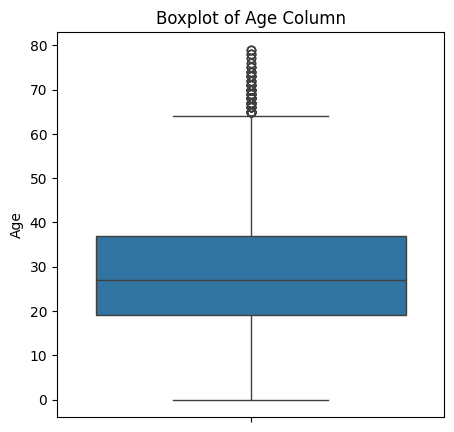

Capping is Done


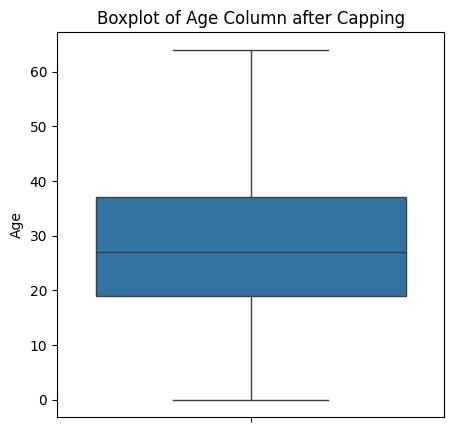

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

print("For Age Column in Training Data")
print("Null Values in Age Column:",df['Age'].isnull().sum())
df['Age'].fillna(value=0,inplace=True)
print("Null Values are filled")

plt.figure(figsize=(5,5))
sns.boxplot(df['Age'])
plt.title("Boxplot of Age Column")
plt.show()

q3_age=df['Age'].quantile(0.75)
q1_age=df['Age'].quantile(0.25)
iqr_age=q3_age-q1_age
upper_age=q3_age + 1.5*iqr_age
df['Age']=np.where(df['Age']>upper_age,upper_age,df['Age'])
print("Capping is Done")

plt.figure(figsize=(5,5))
sns.boxplot(df['Age'])
plt.title("Boxplot of Age Column after Capping")
plt.show()

For Age Column in Testing Data
Null Values in Age Column: 91
Null Values are filled


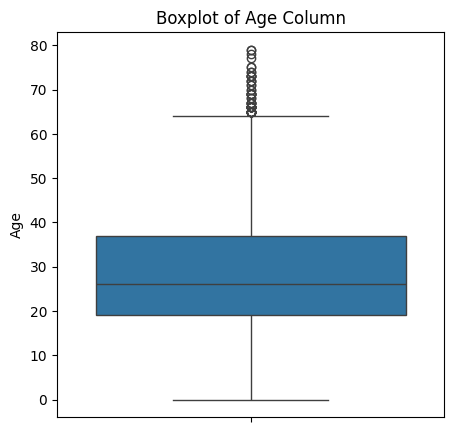

Capping is Done


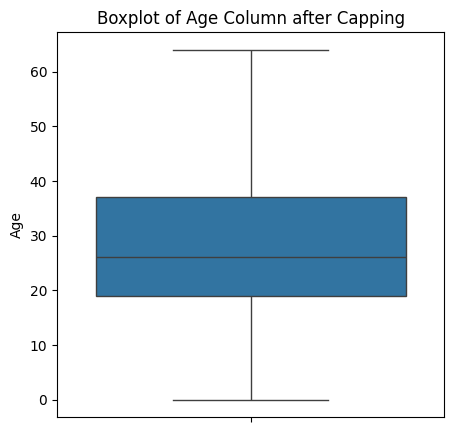

In [22]:
print("For Age Column in Testing Data")
print("Null Values in Age Column:",df_test['Age'].isnull().sum())
df_test['Age'].fillna(value=0,inplace=True)
print("Null Values are filled")

plt.figure(figsize=(5,5))
sns.boxplot(df_test['Age'])
plt.title("Boxplot of Age Column")
plt.show()

q3_age_test=df_test['Age'].quantile(0.75)
q1_age_test=df_test['Age'].quantile(0.25)
iqr_age_test=q3_age_test - q1_age_test
upper_age_test=q3_age_test + 1.5*iqr_age_test
df_test['Age']=np.where(df_test['Age']>upper_age_test,upper_age_test,df_test['Age'])
print("Capping is Done")

plt.figure(figsize=(5,5))
sns.boxplot(df_test['Age'])
plt.title("Boxplot of Age Column after Capping")
plt.show()

In [23]:
print("For VIP Column in Training Data")
print("Null Values in VIP:",df['VIP'].isnull().sum())
df['VIP'].fillna(value=-1,inplace=True)
print("Null Values are filled")

df['VIP']=df['VIP'].astype(int)

For VIP Column in Training Data
Null Values in VIP: 203
Null Values are filled


In [24]:
print("For VIP Column in Testing Data")
print("Null Values in VIP:",df_test['VIP'].isnull().sum())
df_test['VIP'].fillna(value=-1,inplace=True)
print("Null Values are filled")

df_test['VIP']=df_test['VIP'].astype(int)

For VIP Column in Testing Data
Null Values in VIP: 93
Null Values are filled


Working on all Billed Columns in training data
count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64
Null Value Count : 181
Null Value Count after filling: 0
--------------------------------------------------
count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64
Null Value Count : 183
Null Value Count after filling: 0
--------------------------------------------------
count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64
Null Value Count : 208
Null Value Count after filling: 0
--------------------------------------------------


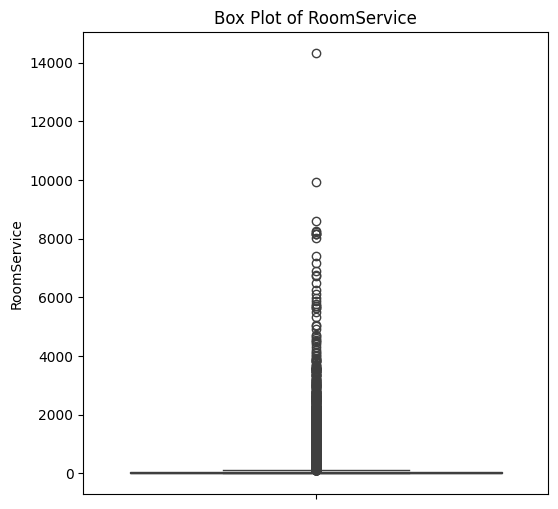

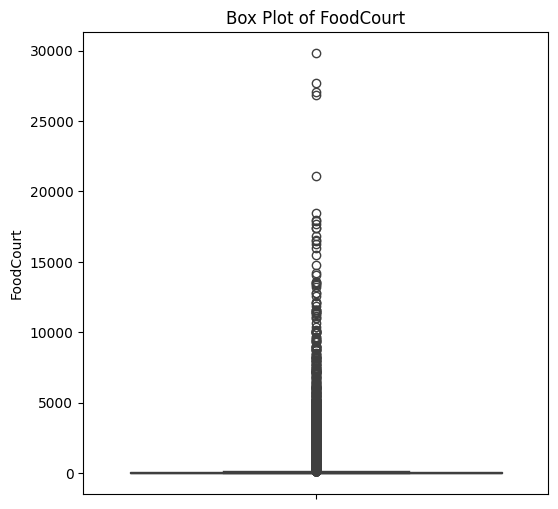

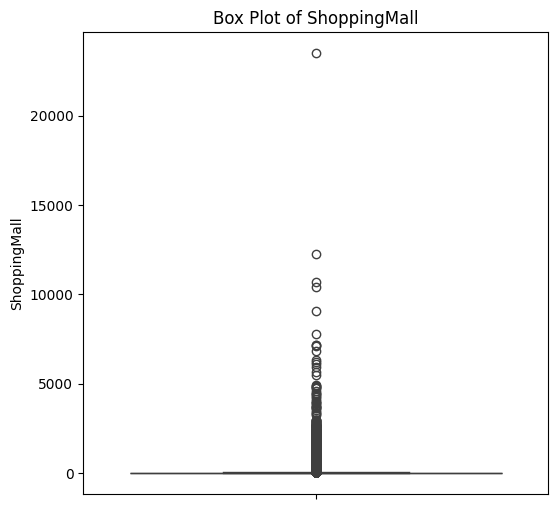

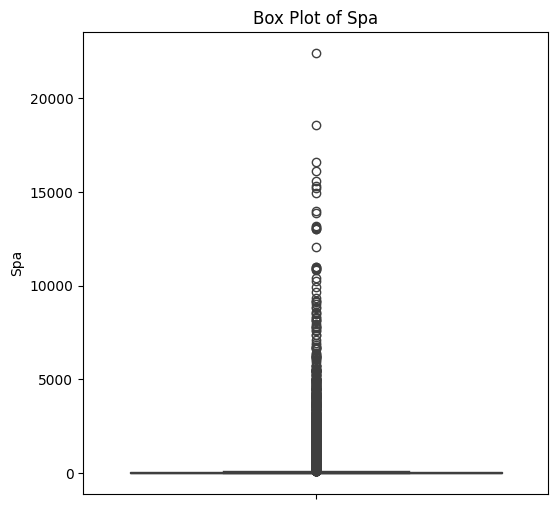

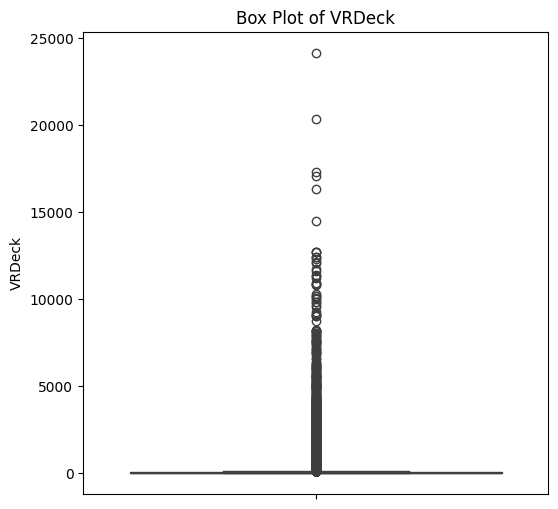

In [25]:
print("Working on all Billed Columns in training data")
billed=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for col in billed:
    print(df[col].describe())
    print("Null Value Count :",df[col].isnull().sum())
    df[col].fillna(value=0,inplace=True)
    print("Null Value Count after filling:",df[col].isnull().sum())
    print('-'*50)
    
for col in billed:
    plt.figure(figsize=(6,6))
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

for col in billed:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    df[col]=np.where(df[col]>upper,upper,df[col])

Working on all Billed Columns in testing data
count     4195.000000
mean       219.266269
std        607.011289
min          0.000000
25%          0.000000
50%          0.000000
75%         53.000000
max      11567.000000
Name: RoomService, dtype: float64
Null Value Count : 82
Null Value Count after filling: 0
--------------------------------------------------
count     4171.000000
mean       439.484296
std       1527.663045
min          0.000000
25%          0.000000
50%          0.000000
75%         78.000000
max      25273.000000
Name: FoodCourt, dtype: float64
Null Value Count : 106
Null Value Count after filling: 0
--------------------------------------------------
count    4179.000000
mean      177.295525
std       560.821123
min         0.000000
25%         0.000000
50%         0.000000
75%        33.000000
max      8292.000000
Name: ShoppingMall, dtype: float64
Null Value Count : 98
Null Value Count after filling: 0
--------------------------------------------------
count     4

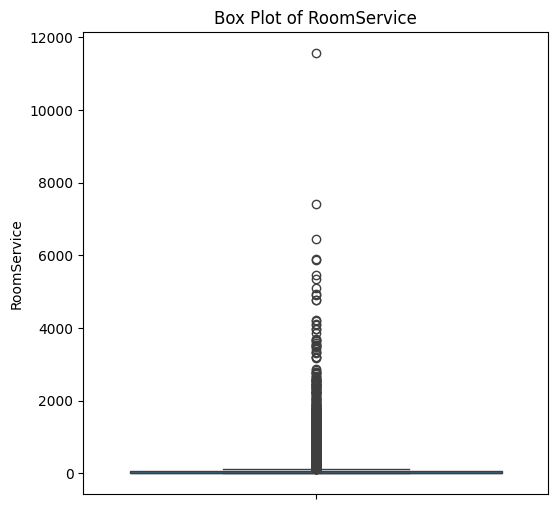

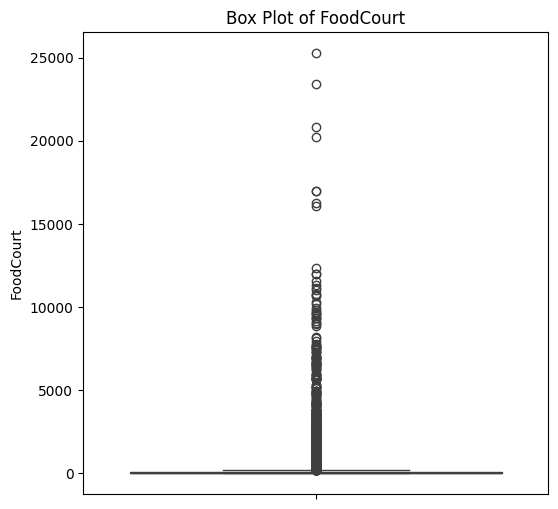

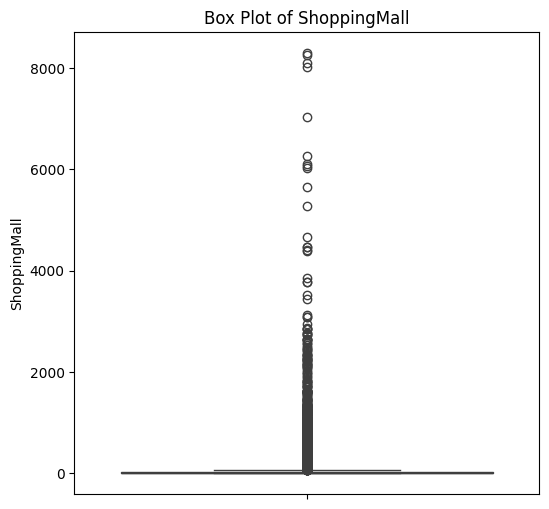

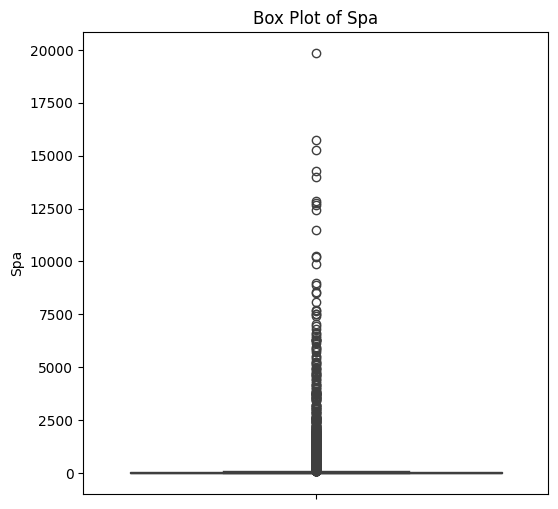

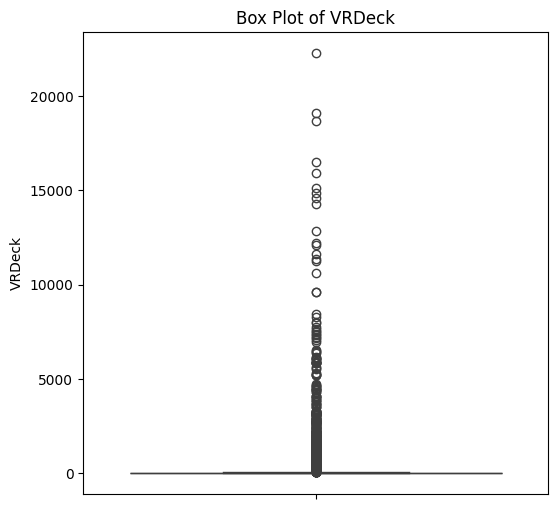

In [26]:
print("Working on all Billed Columns in testing data")
billed=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for col in billed:
    print(df_test[col].describe())
    print("Null Value Count :",df_test[col].isnull().sum())
    df_test[col].fillna(value=0,inplace=True)
    print("Null Value Count after filling:",df_test[col].isnull().sum())
    print('-'*50)
    
for col in billed:
    plt.figure(figsize=(6,6))
    sns.boxplot(df_test[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

for col in billed:
    q1=df_test[col].quantile(0.25)
    q3=df_test[col].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    df_test[col]=np.where(df_test[col]>upper,upper,df_test[col])

In [27]:
df['Transported']=df['Transported'].astype(int)

In [28]:
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HP_Earth,HP_Europa,HP_Mars,Cabin_Deck,Cabin_Num,Cabin_Side,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,1,0,1.0,0,0.0,0,0,1
1,0002_01,0,24.0,0,102.5,9.0,25.0,132.5,44.0,Juanna Vines,1,1,0,0,5.0,0,1.0,0,0,1
2,0003_01,0,58.0,1,43.0,152.5,0.0,132.5,49.0,Altark Susent,0,0,1,0,0.0,0,1.0,0,0,1
3,0003_02,0,33.0,0,0.0,152.5,55.0,132.5,100.0,Solam Susent,0,0,1,0,0.0,0,1.0,0,0,1
4,0004_01,0,16.0,0,102.5,70.0,55.0,132.5,2.0,Willy Santantines,1,1,0,0,5.0,1,1.0,0,0,1


In [29]:
df_test.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HP_Earth,HP_Europa,HP_Mars,Cabin_Deck,Cabin_Num,Cabin_Side,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1,0,0,6.0,3,1.0,0,0,1
1,0018_01,0,19.0,0,0.0,9.0,0.0,107.5,0.0,Lerome Peckers,1,0,0,5.0,4,1.0,0,0,1
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0,1,0,2.0,0,1.0,1,0,0
3,0021_01,0,38.0,0,0.0,165.0,0.0,107.5,77.5,Meratz Caltilter,0,1,0,2.0,1,1.0,0,0,1
4,0023_01,0,20.0,0,10.0,0.0,67.5,0.0,0.0,Brence Harperez,1,0,0,5.0,5,1.0,0,0,1


### Now lets do Model building and select Best Accurated one.

In [30]:
X=df.drop(columns=['PassengerId','Name','Transported'],axis=1)
y=df['Transported']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

svm=SVC(kernel='rbf',C=2,gamma='scale',probability=True)
svm.fit(X_train_scaled,y_train)
y_pred=svm.predict(X_test_scaled)
print("Accurcy of SVM :",accuracy_score(y_test,y_pred))

Accurcy of SVM : 0.7694077055779184


In [33]:
from xgboost import XGBClassifier

xgb=XGBClassifier(n_estimators=400,learning_rate=0.01,max_depth=6,subsample=0.8,colsample_bytree=0.8,random_state=42,eval_metric='logloss')
xgb.fit(X_train,y_train)

y_pred_xgb=xgb.predict(X_test)
print("Accuracy of XGBoost :",accuracy_score(y_test,y_pred_xgb))

Accuracy of XGBoost : 0.7757331799884991


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=500,max_depth=None,min_samples_split=2,random_state=42)
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)
print("Accuracy of RandomForest :",accuracy_score(y_test,y_pred_rf))

Accuracy of RandomForest : 0.7717078780908568


In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,max_depth=3,subsample=0.9,random_state=42)
gbc.fit(X_train,y_train)

y_pred_gbc=gbc.predict(X_test)
print("Accuracy score of Gradient Boost :",accuracy_score(y_test,y_pred_gbc))

Accuracy score of Gradient Boost : 0.780333525014376


### Now its Time for Submission of predicted outputs using test.csv on best performed model(i.e, GradientBoostingClassifier)

In [36]:
input_test=df_test.drop(['PassengerId','Name'],axis=1)

In [37]:
y_pred=gbc.predict(input_test)

In [38]:
y_pred_series=pd.Series(y_pred,index=df_test.index,name="Transported")
df_test=df_test.join(y_pred_series)

In [39]:
submission=df_test[['PassengerId','Transported']]

In [40]:
submission.to_csv('Submission.csv', index=False)